In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split

from subprocess import check_output

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
RND_SEED=1

# Loading the data and feature engineering

In [5]:
store =  pd.read_csv('store.csv')
test = pd.read_csv('test.csv')
train =  pd.read_csv('train.csv')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#Make joined datasets for test and train
train['Set'] = 1
test['Set'] = 0
df = pd.concat([train,test])

In [7]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [8]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
df.head()

,Customers,Date,DayOfWeek,Id,Open,Promo,Sales,SchoolHoliday,Set,StateHoliday,Store
0,555.0,2015-07-31,5,NaN,1.0,1,5263.0,1,1,0,1
1,625.0,2015-07-31,5,NaN,1.0,1,6064.0,1,1,0,2
2,821.0,2015-07-31,5,NaN,1.0,1,8314.0,1,1,0,3
3,1498.0,2015-07-31,5,NaN,1.0,1,13995.0,1,1,0,4
4,559.0,2015-07-31,5,NaN,1.0,1,4822.0,1,1,0,5


In [10]:
#Fields have both "0" and 0 values
df["StateHoliday"].loc[df["StateHoliday"] == "0"] = 0

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
#Convert types StoreType, Assortment, StateHoliday
store['StoreType'] = store['StoreType'].astype('category').cat.codes
store['Assortment'] = store['Assortment'].astype('category').cat.codes
df["StateHoliday"] = df["StateHoliday"].astype('category').cat.codes

In [12]:
df['StateHoliday'].value_counts()

0    1027067
1      20440
2       6690
3       4100
Name: StateHoliday, dtype: int64

In [13]:
#Let's find the average number of sales per shop and join it with store table
average_sales_customers = train.groupby('Store')[["Sales", "Customers"]].mean()
sales_customers_df = pd.DataFrame({'Store':average_sales_customers.index,
                      'Sales':average_sales_customers["Sales"], 'Customers': average_sales_customers["Customers"]}, 
                      columns=['Store', 'Sales', 'Customers'])
store = pd.merge(sales_customers_df, store, on='Store')

store.head()

,Store,Sales,Customers,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,3945.704883,467.646497,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4122.991507,486.045648,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5741.253715,620.286624,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,8021.769639,1100.057325,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,3867.110403,444.360934,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [14]:
#The table has null values
store.isnull().sum()

Store                          0
Sales                          0
Customers                      0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [15]:
#Remove shops that were opened but didn't sell anything
df = df.loc[~((df['Open'] == 1) & (df['Sales'] == 0))]

In [16]:
#Store id numbers of closed shops, later set them to null values
closed_ids = df["Id"][df["Open"] == 0].values

In [17]:
#Remove zero valued cells from closed_ids
closed_ids = closed_ids[~np.isnan(closed_ids)]

In [18]:
#Remove cells for closed shops from the table
df = df[df["Open"] != 0]

In [19]:
#Transform field CompetitionOpenSinceYear
def convertCompetitionOpen(df):
    try:
        date = '{}-{}'.format(int(df['CompetitionOpenSinceYear']), int(df['CompetitionOpenSinceMonth']))
        return pd.to_datetime(date)
    except:
        return np.nan

store['CompetitionOpenInt'] = store.apply(lambda df: convertCompetitionOpen(df), axis=1).astype(np.int64)

In [20]:
#Define main features of the store table
features_store = ['Store', 'StoreType', 'Assortment', 
                  'CompetitionDistance', 'CompetitionOpenInt']
features_y = ['Sales']

In [21]:
df.head()

,Customers,Date,DayOfWeek,Id,Open,Promo,Sales,SchoolHoliday,Set,StateHoliday,Store
0,555.0,2015-07-31,5,NaN,1.0,1,5263.0,1,1,0,1
1,625.0,2015-07-31,5,NaN,1.0,1,6064.0,1,1,0,2
2,821.0,2015-07-31,5,NaN,1.0,1,8314.0,1,1,0,3
3,1498.0,2015-07-31,5,NaN,1.0,1,13995.0,1,1,0,4
4,559.0,2015-07-31,5,NaN,1.0,1,4822.0,1,1,0,5


In [22]:
df = pd.merge(df, store[features_store], how='left', on=['Store'])

In [23]:
#Define the main features correlating with the result
features_x = ['DayOfWeek','Promo', 'SchoolHoliday', 'StateHoliday', 'StoreType', 'Assortment', 
                  'CompetitionDistance', 'CompetitionOpenInt']

In [24]:
df[features_x].isnull().sum()

DayOfWeek                 0
Promo                     0
SchoolHoliday             0
StateHoliday              0
StoreType                 0
Assortment                0
CompetitionDistance    2262
CompetitionOpenInt        0
dtype: int64

In [25]:
#Put all Nan vauled cells in CompetitionDistance to -1
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(-1)

In [26]:
#Check again
df[features_x].isnull().sum()

DayOfWeek              0
Promo                  0
SchoolHoliday          0
StateHoliday           0
StoreType              0
Assortment             0
CompetitionDistance    0
CompetitionOpenInt     0
dtype: int64

In [27]:
df[features_x].head()

,DayOfWeek,Promo,SchoolHoliday,StateHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenInt
0,5,1,1,0,2,0,1270.0,1220227200000000000
1,5,1,1,0,0,0,570.0,1193875200000000000
2,5,1,1,0,0,0,14130.0,1164931200000000000
3,5,1,1,0,2,2,620.0,1251763200000000000
4,5,1,1,0,0,0,29910.0,1427846400000000000


In [28]:
#Check pairs of the features
#scatterplot
sns.set()
sns.pairplot(df[features_x], size = 2.5)
plt.show()

KeyboardInterrupt: 

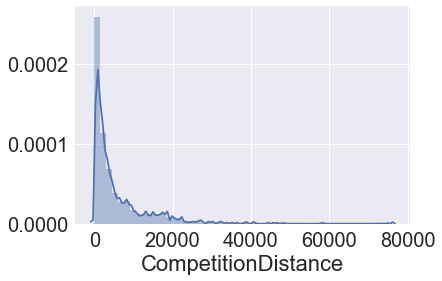

In [48]:
sns.distplot(df['CompetitionDistance']);

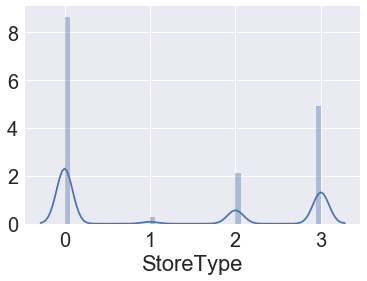

In [50]:
sns.distplot(df['StoreType']);

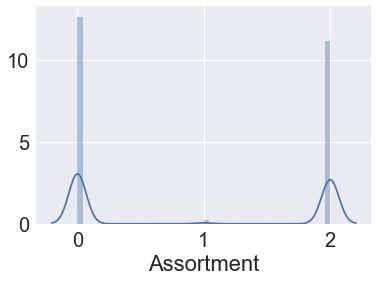

In [51]:
sns.distplot(df['Assortment']);

In [29]:
#Define the full data
X, y = np.array(df.loc[(df['Set'] == 1)][features_x]),np.array(df.loc[(df['Set'] == 1)][features_y])

In [30]:
#Flatten the full data
y=np.ravel(y)

In [31]:
# split into training and test for the purposes of the demonstration
# make feature matrix
test_size = 0.1
rstate = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=test_size,
                                                            random_state=rstate)

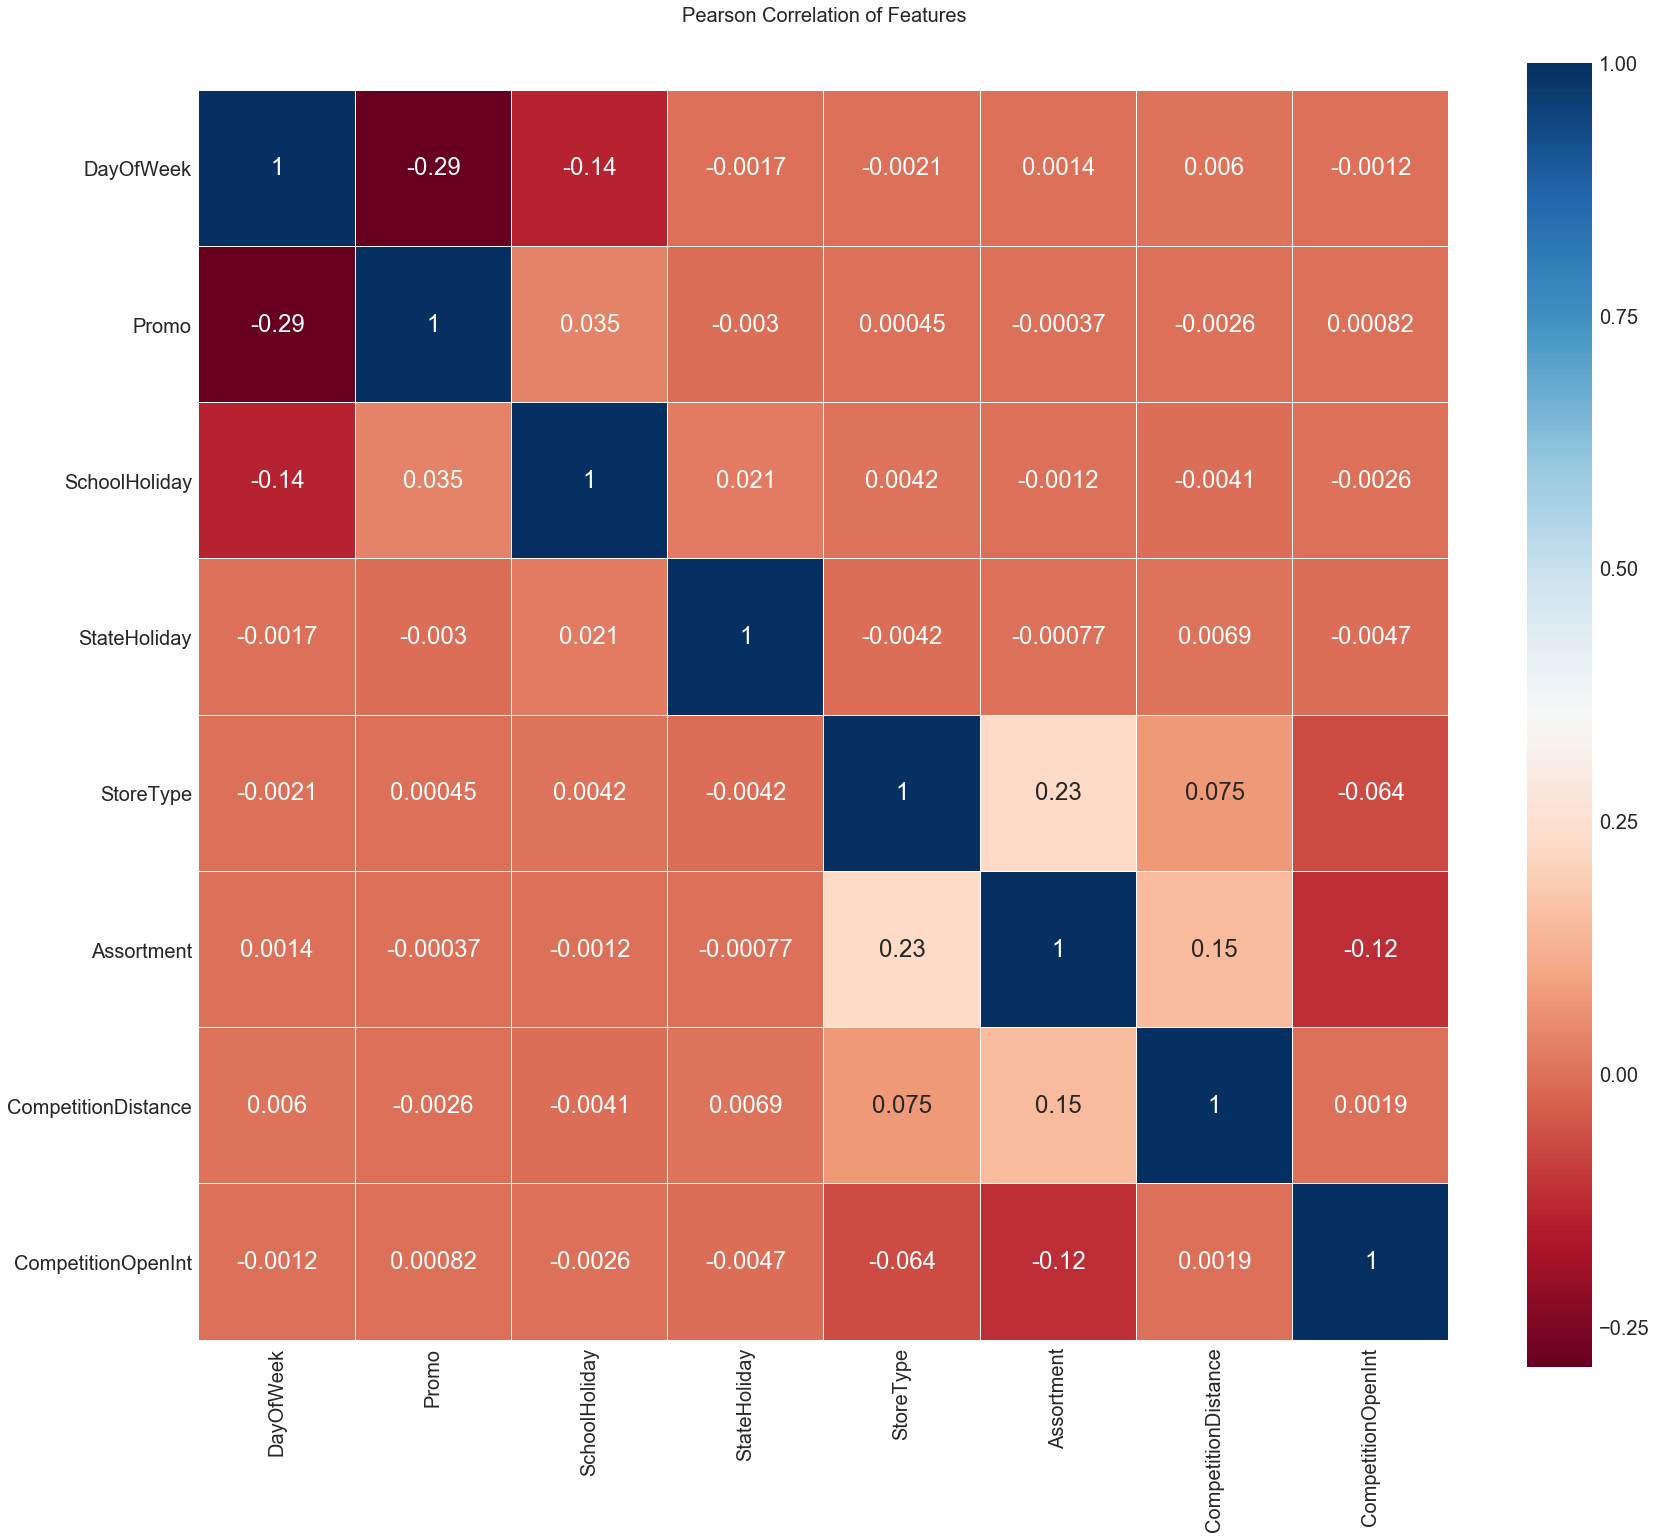

In [32]:
colormap = plt.cm.RdBu
sns.set(font_scale=2)
plt.figure(figsize=(28,24))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(df[features_x].astype(float).corr(),linewidths=0.01,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# First we will try the random forest regression

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [34]:
#Check the best depth of the random forest
#scores = []
#for d in range(18,24):
#    model =  RandomForestRegressor(max_depth=d)
#    scores.append(cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean())
#plt.plot(range(18,24), scores)

In [35]:
#Train our model
randomForest = RandomForestRegressor(max_depth=24)
randomForest.verbose = True
randomForest.fit(X_test, y_test)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=24,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=True,
           warm_start=False)

In [36]:
#Define the test data
#X_test=np.array(df.loc[(df['Set'] == 0)][features_x])
#X_test.shape

In [37]:
# evaluate performance of the random forest models

def rmsle(actual, predicted):
    """
    Args:
        actual (1d-array) - array of actual values (float)
        predicted (1d-array) - array of predicted values (float)
    Returns:
        root mean square log error (float)
    """
    return np.sqrt(np.mean(np.power(np.log1p(actual)-np.log1p(predicted), 2)))

def plot_actual_pred(train_actual, train_pred, 
                     test_actual, test_pred,
                     target):
    """
    Args:
        train_actual (1d-array) - actual training values (float)
        train_pred (1d-array) - predicted training values (float)
        test_actual (1d-array) - actual test values (float)
        test_pred (1d-array) - predicted test values (float)
        target (str) - target property
    Returns:
        matplotlib scatter plot of actual vs predicted
    """
    s = 75
    lw = 0
    alpha = 0.2
    train_color = 'orange'
    train_marker = 's'
    test_color = 'red'
    test_marker = '^'
    axis_width = 1.5
    maj_tick_len = 6
    fontsize = 16
    label = '__nolegend__'
    ax = plt.scatter(train_pred, train_actual,
                     marker=train_marker, color=train_color, s=s, 
                     lw=lw, alpha=alpha, label='train')
    ax = plt.scatter(test_pred, test_actual,
                     marker=test_marker, color=test_color, s=s, 
                     lw=lw, alpha=alpha, label='test')
    ax = plt.legend(frameon=False, fontsize=fontsize, handletextpad=0.4)    
    all_vals = list(train_pred) + list(train_actual) + list(test_pred) + list(test_actual)
    full_range = abs(np.max(all_vals) - np.min(all_vals))
    cushion = 0.1
    xmin = np.min(all_vals) - cushion*full_range
    xmax = np.max(all_vals) + cushion*full_range
    ymin = xmin
    ymax = xmax    
    ax = plt.xlim([xmin, xmax])
    ax = plt.ylim([ymin, ymax])
    ax = plt.plot([xmin, xmax], [ymin, ymax], 
                  lw=axis_width, color='black', ls='--', 
                  label='__nolegend__')
    ax = plt.xlabel('predicted ' + target, fontsize=fontsize)
    ax = plt.ylabel('actual ' + target, fontsize=fontsize)
    ax = plt.xticks(fontsize=fontsize)
    ax = plt.yticks(fontsize=fontsize)
    ax = plt.tick_params('both', length=maj_tick_len, width=axis_width, 
                         which='major', right=True, top=True)
    return ax  
# plot the feature importances

def plot_importances(X_train, sorted_features, sorted_importances):
    """
    Args:
        X_train (nd-array) - feature matrix of shape (number samples, number features)
        sorted_features (list) - feature names (str)
        sorted_importances (list) - feature importances (float)
    Returns:
        matplotlib bar chart of sorted importances
    """
    axis_width = 1.5
    maj_tick_len = 6
    fontsize = 14
    bar_color = 'lightblue'
    align = 'center'
    label = '__nolegend__'
    ax = plt.bar(range(X_train.shape[1]), sorted_importances,
                 color=bar_color, align=align, label=label)
    ax = plt.xticks(range(X_train.shape[1]), sorted_features, rotation=90)
    ax = plt.xlim([-1, X_train.shape[1]])
    ax = plt.ylabel('Average impurity decrease', fontsize=fontsize)
    ax = plt.tick_params('both', length=maj_tick_len, width=axis_width, 
                         which='major', right=True, top=True)
    ax = plt.xticks(fontsize=fontsize)
    ax = plt.yticks(fontsize=fontsize)
    ax = plt.tight_layout()
    return ax

In [38]:
# report the most important featuers for predicting each target

# collect ranking of most "important" features for E
importances =  randomForest.feature_importances_
descending_indices = np.argsort(importances)[::-1]
sorted_importances = [importances[idx] for idx in descending_indices]
sorted_features_x = [features_x[idx] for idx in descending_indices]
print('The most important feature for sales is %s' % sorted_features_x[0])

The most important feature for sales is CompetitionDistance


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


RMSLE for sales = 0.190 (training) and 0.156 (test)


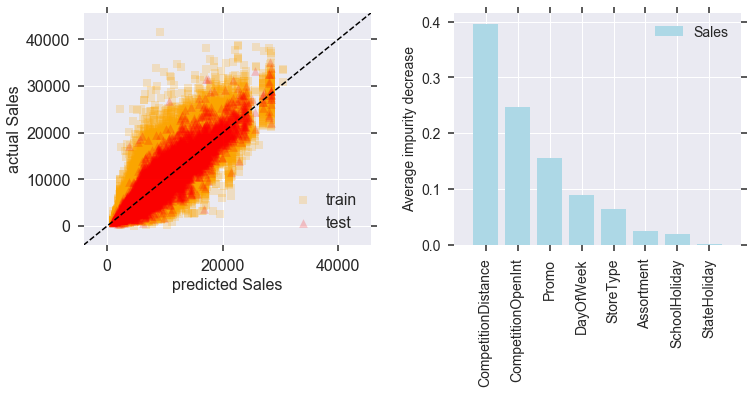

In [39]:
#Plot prediction results and importances
y_train_pred = randomForest.predict(X_train)
y_test_pred = randomForest.predict(X_test)
target = 'Sales'
print('RMSLE for sales = %.3f (training) and %.3f (test)' 
      % (rmsle(y_train, y_train_pred),  (rmsle(y_test, y_test_pred))))
fig = plt.figure(3, figsize=(11,6))
ax1 = plt.subplot(121)
ax1 = plot_actual_pred(y_train, y_train_pred,
                       y_test, y_test_pred,
                       target)
ax2 = plt.subplot(122)
ax2 = plot_importances(X_train, sorted_features_x, sorted_importances)
ax2 = plt.legend(['Sales'], fontsize=14, frameon=False)
plt.tight_layout()
plt.show()
plt.close()

# Now we try the linear regression method

In [40]:
from sklearn.cross_validation import *
from sklearn.linear_model import *

In [41]:
#Train our model
lg = LinearRegression()
lg.verbose = False
lg.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
result2 = lg.predict(X_test)
#print cross_val_score(lg, X_train, y_train, cv=5, scoring='r2').mean()

In [43]:
#As importances we can consider the magnitude of its coefficient times the standard deviation 
#of the corresponding parameter in the data.
importances=np.abs((np.std(df[features_x], 0)*lg.coef_))
sorted_importances = [importances[idx] for idx in descending_indices]
sorted_features_x = [features_x[idx] for idx in descending_indices]
print('The most important feature for sales is %s' % sorted_features_x[1])

The most important feature for sales is CompetitionOpenInt


In [44]:
sorted_importances

[110.82055688475023,
 414.89654844888065,
 7.2033809888346957e-10,
 3.2216881454010965e-08,
 2.4903014912872964e-07,
 2.6919990748564304e-07,
 1.3509258380750238e-09,
 2.5227212634861197e-11]

RMSLE for sales = 0.438 (training) and 0.438 (test)


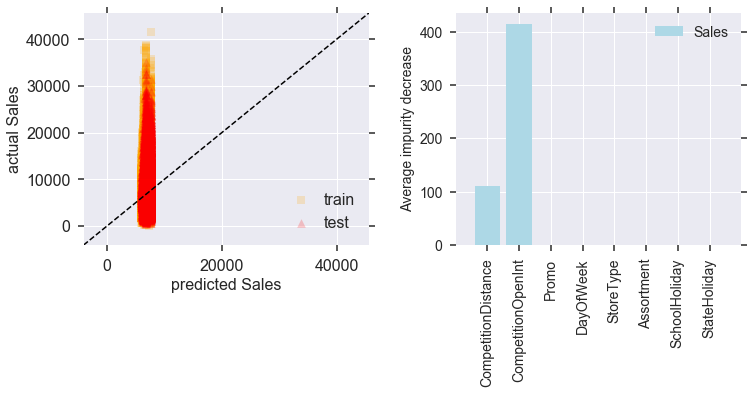

In [46]:
#Plot prediction results and importances
y_train_pred = lg.predict(X_train)
y_test_pred = lg.predict(X_test)
target = 'Sales'
print('RMSLE for sales = %.3f (training) and %.3f (test)' 
      % (rmsle(y_train, y_train_pred),  (rmsle(y_test, y_test_pred))))
fig = plt.figure(3, figsize=(11,6))
ax1 = plt.subplot(121)
ax1 = plot_actual_pred(y_train, y_train_pred,
                       y_test, y_test_pred,
                       target)
ax2 = plt.subplot(122)
ax2 = plt.ylabel('Importances', fontsize=14)
ax2 = plot_importances(X_train, sorted_features_x, sorted_importances)
ax2 = plt.legend(['Sales'], fontsize=14, frameon=False)
plt.tight_layout()
plt.show()
plt.close()

# Let us try ARIMA method

In [44]:
import statsmodels.api as sm
print(sm.tsa.stattools.adfuller(df['CompetitionDistance']))
print(sm.tsa.stattools.adfuller(df['CompetitionOpenInt']))
print(sm.tsa.stattools.adfuller(df['Sales']))

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


KeyboardInterrupt: 

In [ ]:
df['const']=1
model1=sm.OLS(endog=df['Sales'],exog=df[features_x])
results1=model1.fit()
print(results1.summary())

In [ ]:
df['diffS']=df['Sales'].diff()
df['diffC']=df['CompetitionDistance'].diff()
model2=sm.OLS(endog=df['diffS'].dropna(),exog=df[['diffC','const']].dropna())
results2=model1.fit()
print(results2.summary())

In [ ]:
df['lag']=df['diffC'].shift()
df.dropna(inplace=True)
model3=sm.tsa.ARIMA(endog=df['Sales'],exog=df[['lag']],order=[1,1,0])
results3=model3.fit()
print(results3.summary())

# And finally we will test the RNN-LSTM model

In [54]:
import tensorflow as tf

In [55]:
lstm_size = 256
lstm_layers = 1
batch_len = 100
learning_rate = 0.001

In [56]:
#n_words = len(vocab_to_int)+1

# Create the graph object
graph = tf.Graph()
# Add nodes to the graph
with graph.as_default():
    inputs_ = tf.placeholder(tf.int32, [None, None], name='inputs')
    labels_ = tf.placeholder(tf.int32, [None, None], name='labels')
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')
    batch_size = tf.placeholder_with_default(tf.constant(batch_len), shape=[], name='batch_size')

In [57]:
with graph.as_default():
    # Basic LSTM cell
    lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)
    
    # Add dropout to the cell
    drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob)
    
    # Stack up multiple LSTM layers, for deep learning
    cell = tf.contrib.rnn.MultiRNNCell([drop] * lstm_layers)
    
    # Getting an initial state of all zeros
    initial_state = cell.zero_state(batch_size, tf.float32)
    
    #Inputs
    inputs = 

In [61]:
with graph.as_default():
    outputs, final_state = tf.nn.dynamic_rnn(cell, inputs , initial_state=initial_state)

NameError: name 'inputs' is not defined

In [59]:
#Output
with graph.as_default():
    predictions = tf.contrib.layers.fully_connected(outputs[:, -1], 1, activation_fn=tf.sigmoid)
    cost = tf.losses.mean_squared_error(labels_, predictions)
    
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

NameError: name 'outputs' is not defined

In [60]:
#Validating
with graph.as_default():
    correct_pred = tf.equal(tf.cast(tf.round(predictions), tf.int32), labels_)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

NameError: name 'predictions' is not defined

In [61]:
#Batching
def get_batches(x, y, batch_size=100):
    n_batches = len(x)//batch_size
    x, y = x[:n_batches*batch_size], y[:n_batches*batch_size]
    for ii in range(0, len(x), batch_size):
        yield x[ii:ii+batch_size], y[ii:ii+batch_size]

In [62]:
#Training
epochs = 5

with graph.as_default():
    saver = tf.train.Saver()

with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    iteration = 1
    for e in range(epochs):
        state = sess.run(initial_state)
        
        for ii, (x, y) in enumerate(get_batches(X_train, y_train, batch_len), 1):
            feed = {inputs_: x,
                    labels_: y[:, None],
                    keep_prob: 0.5,
                    initial_state: state}
            loss, state, _ = sess.run([cost, final_state, optimizer], feed_dict=feed)
            
            if iteration%5==0:
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {}".format(iteration),
                      "Train loss: {:.3f}".format(loss))

            if iteration%25==0:
                val_acc = []
                val_state = sess.run(cell.zero_state(batch_len, tf.float32))
                for x, y in get_batches(val_x, val_y, batch_len):
                    feed = {inputs_: x,
                            labels_: y[:, None],
                            keep_prob: 1,
                            initial_state: val_state}
                    batch_acc, val_state = sess.run([accuracy, final_state], feed_dict=feed)
                    val_acc.append(batch_acc)
                print("Val acc: {:.3f}".format(np.mean(val_acc)))
            iteration +=1
    saver.save(sess, "checkpoints/sales.ckpt")

ValueError: No variables to save